In [1]:
# Import the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Give the input file path of the data set

path = r"/content/drive/MyDrive/Projects/Nuve/Diabetes.csv"

In [3]:
# Loading the Dataset

try:
    df = pd.read_csv(path)
    print("Data loaded successfully")

    print("First few rows of the dataset:\n\n", df.head())
except FileNotFoundError:
    print("Error: File not found. Please provide a valid file path.")
except pd.errors.EmptyDataError:
    print("Error: The provided CSV file is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")


Data loaded successfully
First few rows of the dataset:

    PatientID  Age BloodPressure Cholesterol  Diabetes
0          1   22        120/80      Normal     False
1          2   35        110/70         Low     False
2          3   45        130/85        High      True
3          4   50        140/90        High      True
4          5   29        125/80        High      True


## Basic EDA

In [ ]:
# Top 10 Rows of the dataset

df.head(10)

,PatientID,Age,BloodPressure,Cholesterol,Diabetes
0,1,22,120/80,Normal,False
1,2,35,110/70,Low,False
2,3,45,130/85,High,True
3,4,50,140/90,High,True
4,5,29,125/80,High,True
5,6,40,115/75,Normal,False
6,7,28,122/78,Normal,False
7,8,55,128/82,High,True
8,9,62,135/88,High,True
9,10,18,118/76,Normal,False


In [ ]:
# Shape of the dataset

df.shape

(250, 5)

In [ ]:
# Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      250 non-null    int64 
 1   Age            250 non-null    int64 
 2   BloodPressure  250 non-null    object
 3   Cholesterol    250 non-null    object
 4   Diabetes       250 non-null    bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 8.2+ KB


In [ ]:
# Describe the Numerical data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,250.0,125.500,72.312977,1.0,63.25,125.5,187.75,250.0
Age,250.0,43.312,10.686039,18.0,35.00,44.0,52.00,63.0


In [ ]:
# Describe the Categorical data

df.describe(include='O').T

,count,unique,top,freq
BloodPressure,250,38,120/80,15
Cholesterol,250,3,High,112


In [ ]:
# Identify the Missing Values

df.isna().sum()

PatientID        0
Age              0
BloodPressure    0
Cholesterol      0
Diabetes         0
dtype: int64

In [ ]:
# Checking for duplicate values

df[df.duplicated()].count()

PatientID        0
Age              0
BloodPressure    0
Cholesterol      0
Diabetes         0
dtype: int64

## Splitting Blood Pressure Feature in to two - Systolic & Diastolic

In [4]:
df[["Systolic_BP", "Diastolic_BP"]]=df["BloodPressure"].str.split("/", expand = True).astype(int)

In [5]:
df.head()

,PatientID,Age,BloodPressure,Cholesterol,Diabetes,Systolic_BP,Diastolic_BP
0,1,22,120/80,Normal,False,120,80
1,2,35,110/70,Low,False,110,70
2,3,45,130/85,High,True,130,85
3,4,50,140/90,High,True,140,90
4,5,29,125/80,High,True,125,80


In [6]:
# Removing BloodPressure Column as it is no longer required

df.drop("BloodPressure", axis=1, inplace = True)

In [7]:
# Dropping PatientID Column as its an unwanted column

df.drop(["PatientID"],axis=1,inplace=True)

## Visualising the Data set

In [8]:
# Finding the columns with numerical data and Object data

numericalColumns = df.select_dtypes(include=np.number).columns
print(numericalColumns,"\n")

objectColumns = df.select_dtypes(include=object).columns
print(objectColumns)

Index(['Age', 'Systolic_BP', 'Diastolic_BP'], dtype='object') 

Index(['Cholesterol'], dtype='object')


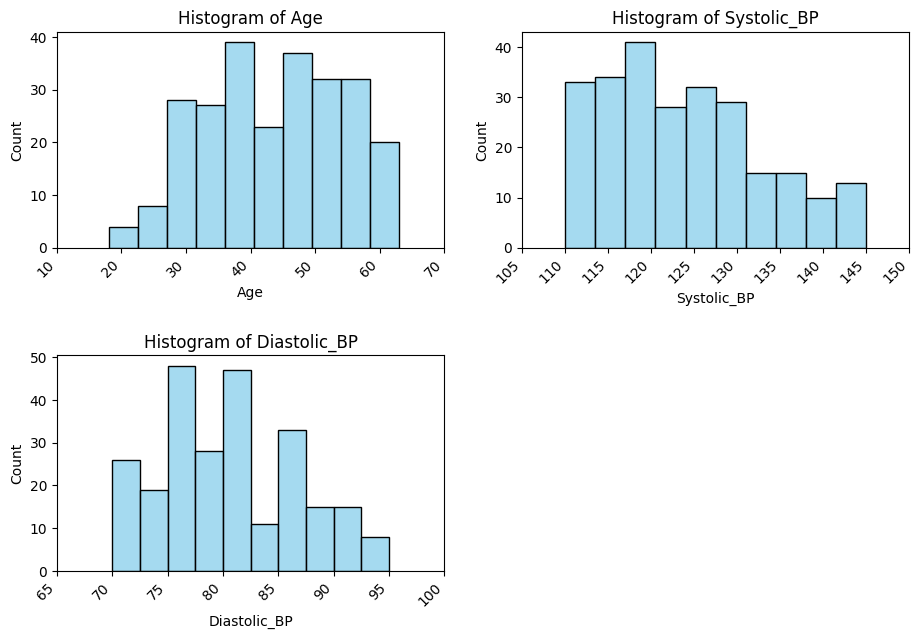

In [9]:
#Data distribution on Continuos data

fig, axes = plt.subplots(2, 2, figsize=(11, 7))
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(numericalColumns, axes.flatten()):
    sns.histplot(x=col,data=df, bins=10, kde=False, color='skyblue', edgecolor='black', ax=ax)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(f'Histogram of {col}')

for i in range(len(numericalColumns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.show()

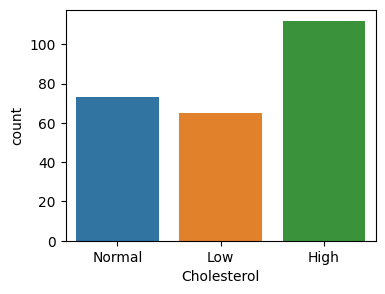

In [10]:
# Categorical data count

plt.figure(figsize=(4, 3))
sns.countplot(x='Cholesterol', data=df)
plt.show()

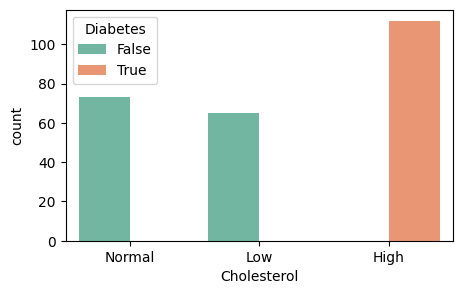

In [11]:
# Categorical data count with hue as Target variable

plt.figure(figsize=(5,3))
sns.countplot(x='Cholesterol', hue='Diabetes', data=df, palette='Set2')
plt.show()

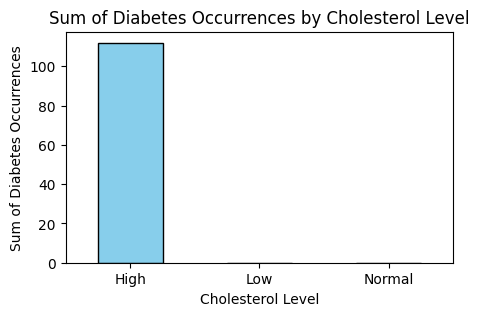

In [12]:
# Plotting the Diabetes Positiveness by Cholesterol Level

plt.figure(figsize=(5,3))
df.groupby("Cholesterol")["Diabetes"].sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sum of Diabetes Occurrences by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Sum of Diabetes Occurrences')
plt.xticks(rotation=0)
plt.show()

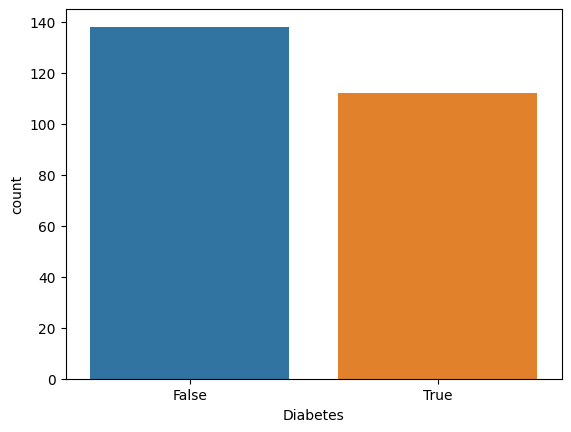

In [13]:
# Plotting the Diabetes Viariable

sns.countplot(x="Diabetes",data=df)
plt.show()

#Task - 1 - Age Grouping

In [14]:
# Function for Grouping patients into age categories & Calculate the average blood pressure for each age group

def avg_blood_pressure_by_age(df):

    bins = [18, 30, 45, 60, float('inf')]
    labels = ['18-30', '31-45', '46-60', '61+']

    # Creating a new column 'AgeCategory' based on the age categories
    df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

    # Group by 'AgeCategory' and calculate the average blood pressure for each group
    avg_blood_pressure_by_age = df.groupby('AgeCategory')[['Systolic_BP', 'Diastolic_BP']].mean()

    # Creating a new column 'AverageBloodPressure' combining systolic and diastolic values
    avg_blood_pressure_by_age['AverageBloodPressure'] = avg_blood_pressure_by_age.apply(
        lambda row: f"{row['Systolic_BP'].round().astype(int)}/{row['Diastolic_BP'].round().astype(int)}", axis=1
    )

    return avg_blood_pressure_by_age

In [15]:
# Calling the function and printing the result

result = avg_blood_pressure_by_age(df)
print("Average Blood Pressure by Age Category:\n")
print(result)

Average Blood Pressure by Age Category:

             Systolic_BP  Diastolic_BP AverageBloodPressure
AgeCategory                                                
18-30         118.516129     76.387097               119/76
31-45         116.765306     75.785714               117/76
46-60         128.912621     83.796117               129/84
61+           138.833333     90.166667               139/90


#Task - 2 - Cholesterol Statistics

In [17]:
# Function for calculating the minimum, maximum, and average cholesterol levels

def cholesterol_stats(df):

    # Converting 'Cholesterol' values to numerical values for calculation
    cholesterol = df['Cholesterol'].replace({'Low': 1, 'Normal': 2, 'High': 3})

    # Calculating minimum, maximum, and average cholesterol levels
    min_cholesterol = cholesterol.min()
    max_cholesterol = cholesterol.max()
    avg_cholesterol = cholesterol.mean().round()

    # Defining categories for cholesterol levels
    cholesterol_categories = pd.cut([min_cholesterol, max_cholesterol, avg_cholesterol],
                                    bins=[-float('inf'),1, 2, 3],
                                    labels=['Low', 'Normal', 'High'])

    # Creating a DataFrame with the calculated values
    result_df = pd.DataFrame({
        'Statistic': ['Minimum', 'Maximum', 'Average'],
        'Cholesterol_Level': [min_cholesterol, max_cholesterol, avg_cholesterol],
        'Cholesterol_Category': cholesterol_categories
    })

    return result_df


In [18]:
# Calling the function and printing the result

result = cholesterol_stats(df)
print("Cholesterol Statistics:\n")
print(result)

Cholesterol Statistics:

  Statistic  Cholesterol_Level Cholesterol_Category
0   Minimum                1.0                  Low
1   Maximum                3.0                 High
2   Average                2.0               Normal


#Task - 3 - Diabetes Prevalence

In [72]:
# Function for determining the prevalence of diabetes among different age groups.
def diabetes_prevalence_by_age(df):

    # Calculating diabetes prevalence for each age group
    diabetes_prevalence_by_age = (df.groupby('AgeCategory')['Diabetes'].mean()*100).round(2)

    # Converting to Data Frame and Renaming Column
    diabetes_prevalence_by_age = diabetes_prevalence_by_age.to_frame(name="Diabetes Percentage(%)")

    return diabetes_prevalence_by_age

In [73]:
# Calling the function and printing the result

prevalence_result = diabetes_prevalence_by_age(df)
print("Diabetes Prevalence by Age Group: \n")
print(prevalence_result)

Diabetes Prevalence by Age Group: 

             Diabetes Percentage(%)
AgeCategory                        
18-30                          9.68
31-45                          6.12
46-60                         82.52
61+                          100.00
